In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv("athlete_events.csv")
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [26]:
data.rename(columns={
    'ID' : 'id',
    'Name': 'isim',
    'Sex':'cinsiyet',
    'Age': 'yas',
    'Height' : 'boy',
    'Weight': 'kilo',
    'Team' : 'takim',
    'Noc' : 'uok',
    'Games' : 'oyunlar',
    'Year' : 'yil',
    'Season' : 'sezon',
    'City' : 'sehir',
    'Sport' : 'spor',
    'Event' : 'etkinlik',
    'Medal': 'madalya'
},inplace=True)

In [27]:
data

,id,isim,cinsiyet,yas,boy,kilo,takim,NOC,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [28]:
essiz_etkinlik = pd.unique(data.etkinlik)
print("Essiz etkinlik sayisi : {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Essiz etkinlik sayisi : 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

Etkinlik ozelinde boy ve kilo verisi var mi kontrol ediyor . var ise genel ortalamayi hesapliyor
yok ise ortalama bir deger atayip sonrasinda tum veriler dolduktan sonra genel ortalamayi hesapliyor.

Her bir etkinlik iteratif olarak dolas
Etkinlik ozelinde boy ve kilo ortalamalarini hesapla
Etkinlik ozelinde kayip boy ve kilo degerlerini etkinlik ortalamalarina esitle

In [29]:
veri_gecici = data.copy() # Gercek veriyi bozmamak icin veriyi kopyaliyorum.
boy_kilo_liste = ["boy","kilo"]

for e in essiz_etkinlik: # Liste icerisinde dolas

    # etkinlik filtresi olustur.
    etkinlik_filtre = veri_gecici.etkinlik == e
    # veriyi etkinlige gore filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]

    # boy ve kilo icin etkinlik ozelinde ortalamalari hesaplayalim
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): # eger etkinlik ozelinde ortalama var ise
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: # eger etkinlik ozelinde ortalama varsa ortalamayi hesapla 
            tum_veri_ortalamasi = np.round(np.mean(data[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
        #etkinlik ozelinde kayip degerleri doldurulmus olan veriyi , veri_gecici'ye esitleyelim
        
    veri_gecici[etkinlik_filtre] = veri_filtreli
# Kayip degerleri giderilmis olan gecici veriyi gercek veriye esitle
data = veri_gecici.copy()
data.info() # Boy ve kilo sutunlarinda kayip deger sayisina bakalim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        271116 non-null  int64  
 1   isim      271116 non-null  object 
 2   cinsiyet  271116 non-null  object 
 3   yas       261642 non-null  float64
 4   boy       271116 non-null  float64
 5   kilo      271116 non-null  float64
 6   takim     271116 non-null  object 
 7   NOC       271116 non-null  object 
 8   oyunlar   271116 non-null  object 
 9   yil       271116 non-null  int64  
 10  sezon     271116 non-null  object 
 11  sehir     271116 non-null  object 
 12  spor      271116 non-null  object 
 13  etkinlik  271116 non-null  object 
 14  madalya   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


YAS SUTUNUNDA KAYIP VERI DOLDURMA

In [31]:
# Yas degiskeninde tanimli olmayan degerleri bulalim
yas_ortalamasi = np.round(np.mean(data.yas),2)
print('Yas Ortalamasi : {}'.format(yas_ortalamasi))
data['yas'] = data['yas'].fillna(yas_ortalamasi)
data.info()

Yas Ortalamasi : 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        271116 non-null  int64  
 1   isim      271116 non-null  object 
 2   cinsiyet  271116 non-null  object 
 3   yas       271116 non-null  float64
 4   boy       271116 non-null  float64
 5   kilo      271116 non-null  float64
 6   takim     271116 non-null  object 
 7   NOC       271116 non-null  object 
 8   oyunlar   271116 non-null  object 
 9   yil       271116 non-null  int64  
 10  sezon     271116 non-null  object 
 11  sehir     271116 non-null  object 
 12  spor      271116 non-null  object 
 13  etkinlik  271116 non-null  object 
 14  madalya   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Madalya alamayan sporcuların veri seti

In [32]:
madalya_degiskeni = data["madalya"]
pd.isnull(madalya_degiskeni).sum()

np.int64(231333)

In [33]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
data = data[madalya_degiskeni_filtresi]
data.head(50)

,id,isim,cinsiyet,yas,boy,kilo,takim,NOC,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
3,4,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
50,17,Paavo Johannes Aaltonen,M,32.0,175.00,64.00,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.00,85.00,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        39783 non-null  int64  
 1   isim      39783 non-null  object 
 2   cinsiyet  39783 non-null  object 
 3   yas       39783 non-null  float64
 4   boy       39783 non-null  float64
 5   kilo      39783 non-null  float64
 6   takim     39783 non-null  object 
 7   NOC       39783 non-null  object 
 8   oyunlar   39783 non-null  object 
 9   yil       39783 non-null  int64  
 10  sezon     39783 non-null  object 
 11  sehir     39783 non-null  object 
 12  spor      39783 non-null  object 
 13  etkinlik  39783 non-null  object 
 14  madalya   39783 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.9+ MB


In [35]:
# Sonradan kullanabilmek icin veriyi kaydedelim
data.to_csv('olimpiyatlar_temizlenmis.csv',index = False)

In [38]:
# Veri sıklığı bilgilerini histogram grafiği sayesinde inceleyeceğiz.
# Temel istatistik bilgilerini ise kutu grafiği sayesinde yorumlayacağız.
# Histogram cizdirebilecegimiz bir fonksiyon olusturalim:
def plotHistogram(degisken):
    """
        Girdi: Degisken/sutun ismi
        Cikti: İlgili değişkenin histogramı
        
    """
    

    plt.figure()
    plt.hist(data[degisken],bins=85,color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sikligi - {}".format(degisken))
    plt.show()

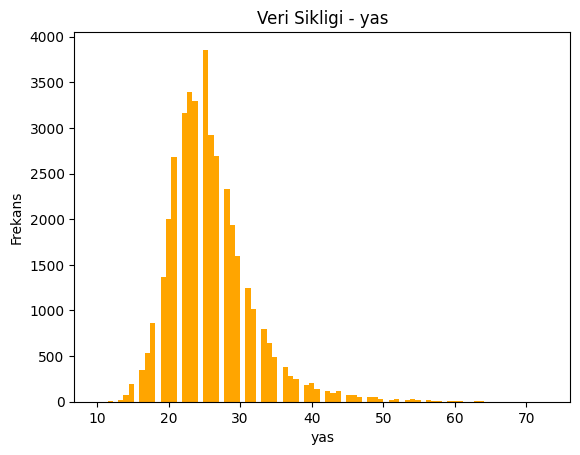

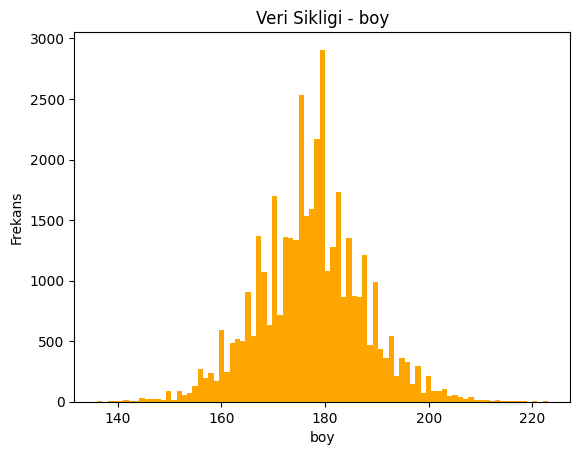

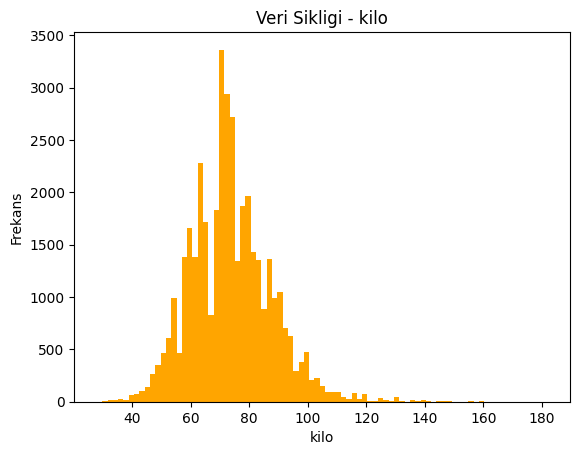

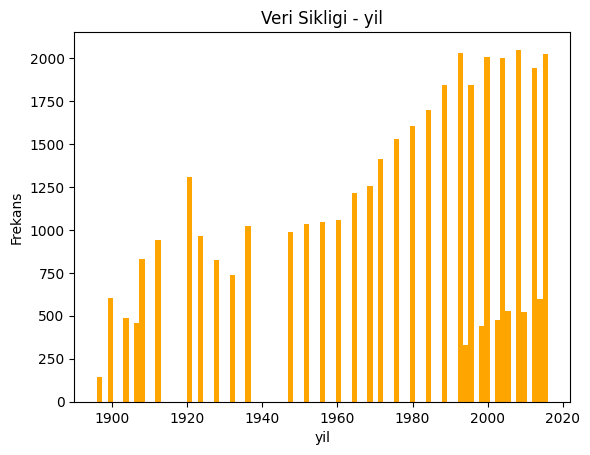

In [39]:
# tum sayisal degiskenler icin histogramlari cizdirelim
sayisal_degisken = ['yas','boy','kilo','yil']

for i in sayisal_degisken:
    plotHistogram(i)